In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageEnhance, ImageOps
%matplotlib inline

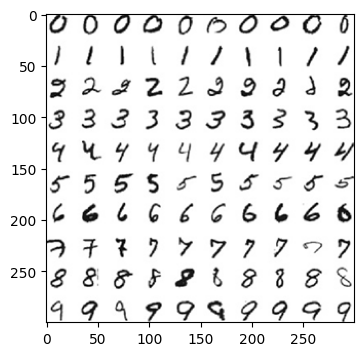

In [ ]:
# load image
image = Image.open('/content/digits5.png')

plt.figure(figsize=(8,4))
plt.imshow(image)
plt.show()

In [ ]:
print(f'Image format: {image.format}')
print(f'Image size: {image.size}')
print(f'Image mode: {image.mode}')

Image format: PNG
Image size: (300, 300)
Image mode: RGBA


Change color mode to black-and-white, 256 shades

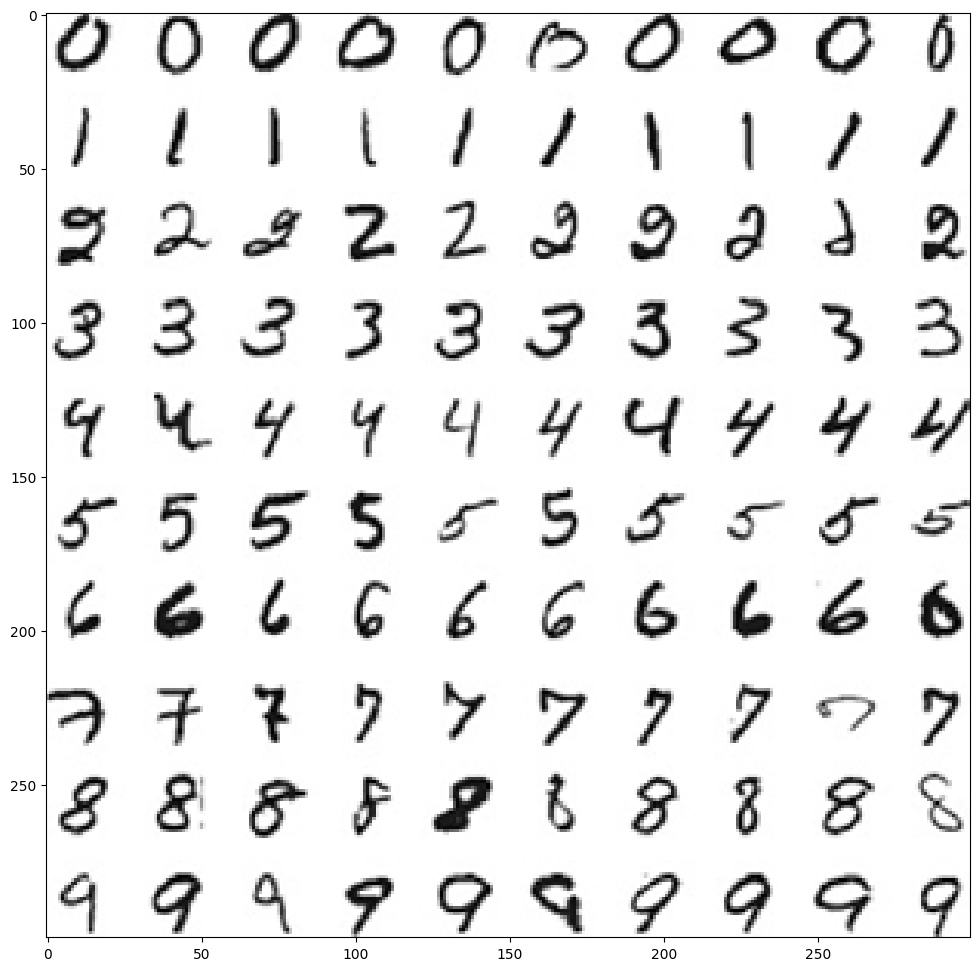

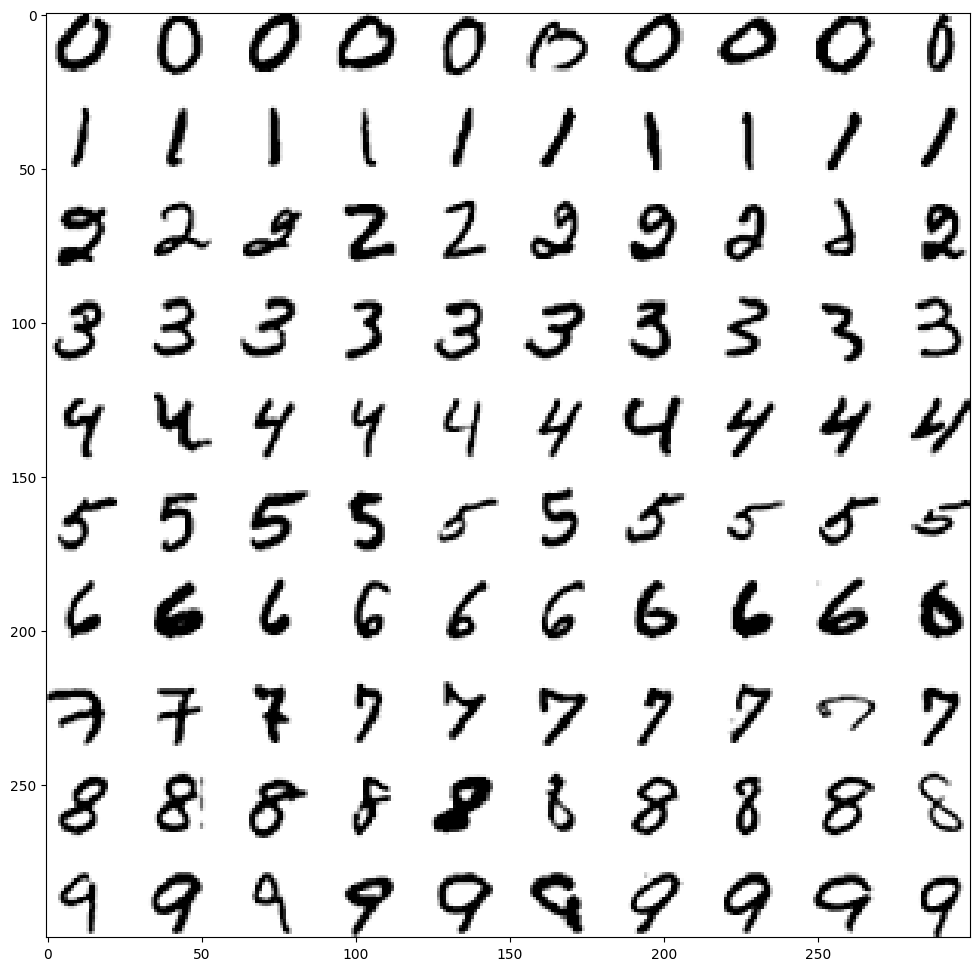

In [ ]:
image = image.convert(mode="L")  # L is 8-bit black-and-white image mode
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')
image = ImageEnhance.Contrast(image).enhance(1.5)
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
images = []
size = 30
for digit, y in enumerate(range(0, image.width, size)):
  cuts=[]
  for x in range(0, image.width, size):
    cut = image.crop(box=(x,y, x+size, y+size))
    cuts.append(cut)
  images.append(cuts)
print(f'Cut {len(images)*len(images[0])}')

Cut 100


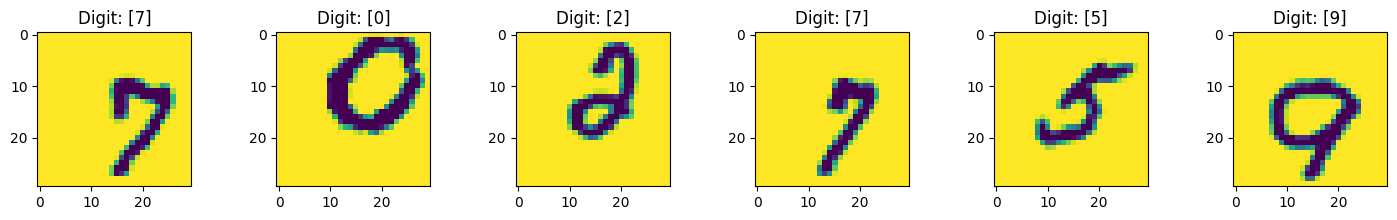

In [ ]:
fig = plt.figure(figsize=(18,2))
ax=fig.subplots(1,6)

for i, n in enumerate(np.random.randint(0, len(images), size=6)):
  m = (np.random.randint(0, len(images[n])))
  ax[i].imshow(images[n][m])
  ax[i].set_title(f'Digit: [{n}]')
plt.show()

Center Images

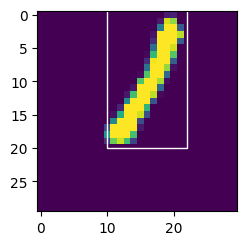

In [ ]:
sample = images[np.random.randint(7)][np.random.randint(7)]

# Inver sample, get bbox and display all that stuff.
inv_sample = ImageOps.invert(sample)
bbox = inv_sample.getbbox()

fig = plt.figure(figsize=(2, 2))
ax = fig.add_axes([0,0,1,1])
ax.imshow(inv_sample)
rect = patches.Rectangle((bbox[0], bbox[3]), bbox[2]-bbox[0], -bbox[3]+bbox[1]-1,fill=False, alpha=1, edgecolor='w')
ax.add_patch(rect)
plt.show()

In [ ]:
#resize image
crop = inv_sample.crop(bbox)

#resize back
new_size = 20
delta_w = new_size - crop.size[0]
delta_h = new_size - crop.size[1]

padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_im = ImageOps.expand(crop, padding)

In [ ]:
def resize_and_center(sample, new_size=20):
    inv_sample = ImageOps.invert(sample)
    bbox = inv_sample.getbbox()
    crop = inv_sample.crop(bbox)

    delta_w = new_size - crop.size[0]
    delta_h = new_size - crop.size[1]

    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    return ImageOps.expand(crop, padding)

resized_images = []
for row in images:
    resized_images.append([resize_and_center(sample) for sample in row])

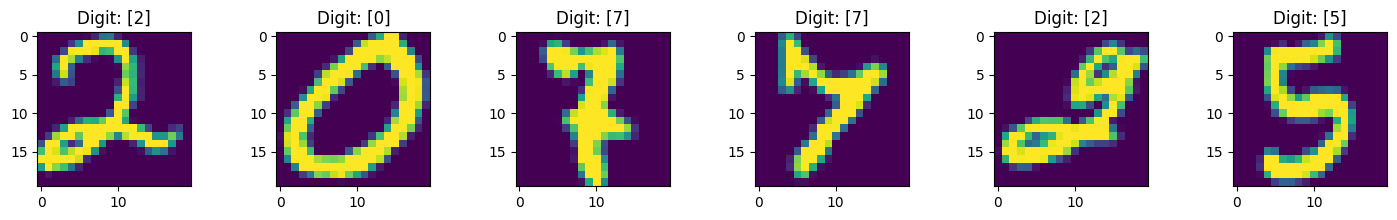

In [ ]:
fig = plt.figure(figsize=(18,2))
ax=fig.subplots(1,6)

for i, n in enumerate(np.random.randint(0, len(resized_images), size=6)):
  m = (np.random.randint(0, len(resized_images[n])))
  ax[i].imshow(resized_images[n][m])
  ax[i].set_title(f'Digit: [{n}]')
plt.show()

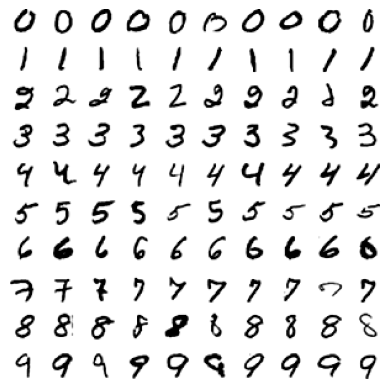

<Figure size 1800x1800 with 0 Axes>

In [ ]:
preview = Image.new('L', (len(images[0]) * 30, len(images) * 30))
x = 0
y = 0
for row in images:
    for sample in row:
        preview.paste(sample, (x, y))
        x += 30
    y += 30
    x = 0

plt.imshow(preview, cmap='gray')
plt.axis('off')
plt.figure(figsize=(18, 18))
plt.show()

In [ ]:
binary_samples = np.array([[sample.getdata() for sample in row] for row in resized_images])
binary_samples = binary_samples.reshape(len(resized_images)*len(resized_images[0]), 20, 20)

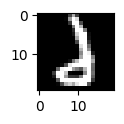

In [ ]:
random_index = np.random.randint(77)
sample_image = binary_samples[random_index]

plt.figure(figsize=(1, 1))
plt.imshow(sample_image, cmap='gray')
plt.show()

In [ ]:
classes = np.array([[i]*10 for i in range(10)]).reshape(100,1)

In [ ]:
print(f'X shape: {binary_samples.shape}')
print(f'y shape: {classes.shape}')

X shape: (100, 20, 20)
y shape: (100, 1)


Save files to numpy binary format

In [ ]:
xfile = 'digits_x_test.npy'
yfile = 'digits_y_test.npy'
np.save(xfile, binary_samples)
np.save(yfile, classes)

In [ ]:
x_test = np.load(xfile)
y_test = np.load(yfile)
x_test.shape, y_test.shape

((100, 20, 20), (100, 1))

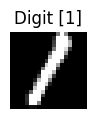

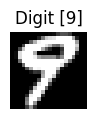

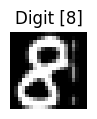

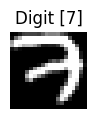

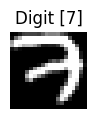

In [ ]:
for i in np.random.randint(x_test.shape[0], size=5):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Digit {y_test[i]}')
    plt.axis('off')
    plt.show()

In [ ]:
#Flatten Array from(100,20,20) to (100,400)

arr = np.load("digits_x_test.npy")
arr_transposed = np.transpose(arr, axes=(0, 2, 1))
arr_flattened = arr_transposed.reshape((100, 400))
np.save('digits_x_test2.npy', arr_flattened)

In [ ]:
#Loading Dataset
X = np.load("digits_x_test2.npy")
y = np.load("digits_y_test.npy")

#print ('The first element of X is: ', X[0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (100, 400)
The shape of y is: (100, 1)


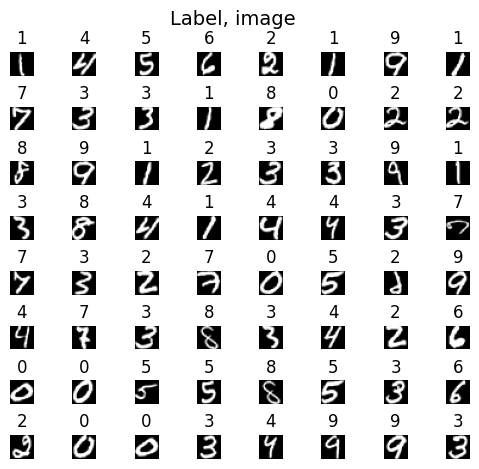

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

Concatenate 2 dataset as one

In [ ]:
data1 = np.load('digits_x_test2.npy')
data2 = np.load('digits_x_test2.npy')

concatenated_X_data = np.concatenate((data1, data2), axis=0)
np.save('Test_X.npy', concatenated_X_data)

data3 = np.load('Test_X.npy')
print('Shape of Test_X:',data3.shape)


data4 = np.load('digits_y_test.npy')
data5 = np.load('digits_y_test.npy')

concatenated_y_data = np.concatenate((data4, data5), axis=0)
np.save('Test_y.npy', concatenated_y_data)

data6 = np.load('Test_y.npy')
print('Shape of Test_y:',data6.shape)

Shape of Test_X: (200, 400)
Shape of Test_y: (200, 1)
